In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
import torch.nn as nn  # Built in neural network models

In [35]:
X = torch.linspace(1,50,50).reshape(-1,1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [36]:
# Random array of error values
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e)

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])


In [37]:
y = 2*X + 1 + e

In [38]:
y.shape

torch.Size([50, 1])

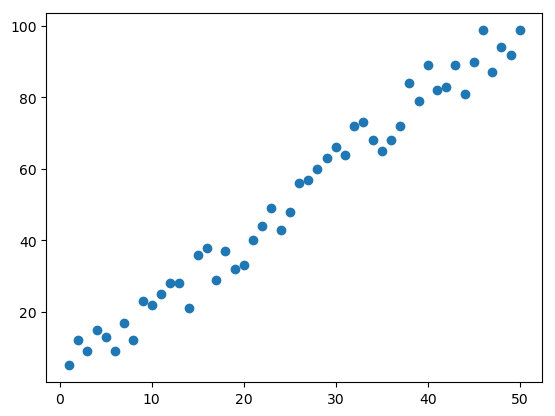

In [39]:
plt.scatter(X.numpy(),y.numpy()) # only for plotting purposes

In [40]:
torch.manual_seed(59)

model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [41]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):

        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [42]:
torch.manual_seed(59)
model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [43]:
for name,param in model.named_parameters():
    print(f'{name} {param.item()}')

linear.weight 0.10597813129425049
linear.bias 0.9637961387634277


In [44]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [45]:
x1 = np.linspace(0.0,50.0,50)
print(x1) # range of inputs

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]


In [46]:
# Testing the models  predictions, the model has not been trained yet
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1
print(y1)

[0.9637     1.07176122 1.17982245 1.28788367 1.3959449  1.50400612
 1.61206735 1.72012857 1.8281898  1.93625102 2.04431224 2.15237347
 2.26043469 2.36849592 2.47655714 2.58461837 2.69267959 2.80074082
 2.90880204 3.01686327 3.12492449 3.23298571 3.34104694 3.44910816
 3.55716939 3.66523061 3.77329184 3.88135306 3.98941429 4.09747551
 4.20553673 4.31359796 4.42165918 4.52972041 4.63778163 4.74584286
 4.85390408 4.96196531 5.07002653 5.17808776 5.28614898 5.3942102
 5.50227143 5.61033265 5.71839388 5.8264551  5.93451633 6.04257755
 6.15063878 6.2587    ]


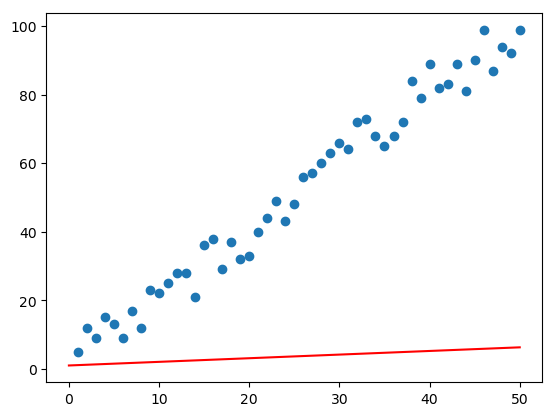

In [47]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')
# Model performs really poorly

In [48]:
## Applying a loss function
criterion = nn.MSELoss() # loss functions are conventioanally named thus.

In [49]:
# Using stochastic gradient descent, with a learning rate
optimizer = torch.optim.SGD(model.parameters(),lr=0.001) # lr = learning rate


In [50]:
# Training the model
# Choose the number of epochs
# We basically created a labelled dataset using the equation "Y".
# Now we're going to train the model to see if we can get a bias and weights similar to the ones we set

# Chosoe a reasonable number of passes
epochs = 50 # Prolly too much
losses = [] # keep track of MSE


for i in range(epochs):

    # Predicting on the forward pass
    y_pred = model.forward(X)

    loss = criterion(y_pred,y) # predicted value and the true value

    losses.append(loss) # record the error
    print(f"epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}")

    # Adjusting the weight and the bias 
    # reset the stored gradient for each new epoch
    optimizer.zero_grad()

    loss.backward()
    optimizer.step() 

epoch 0 loss: 3057.216796875 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 1 loss: 1588.531005859375 weight: 3.334900379180908 bias: 1.0604636669158936
epoch 2 loss: 830.3001098632812 weight: 1.0148327350616455 bias: 0.9922627806663513
epoch 3 loss: 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch 4 loss: 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch 5 loss: 132.4291229248047 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 6 loss: 78.56572723388672 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 7 loss: 50.75775909423828 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 8 loss: 36.4012336730957 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 9 loss: 28.989227294921875 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 10 loss: 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 11 loss: 23.186473846435547 weight: 2.034165620803833 bias: 1.02911627292

Text(0.5, 0, 'Epoch')

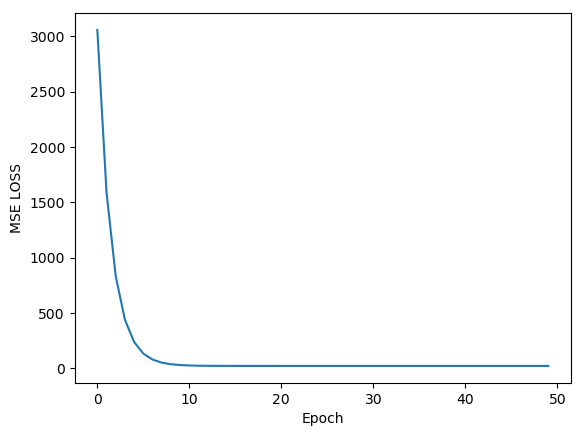

In [52]:
plt.plot(range(epochs),losses)
plt.ylabel("MSE LOSS")
plt.xlabel("Epoch")


In [54]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias
print(predicted_y)

[  1.05575156   3.08005679   5.10436203   7.12866726   9.15297249
  11.17727772  13.20158295  15.22588818  17.25019342  19.27449865
  21.29880388  23.32310911  25.34741434  27.37171957  29.39602481
  31.42033004  33.44463527  35.4689405   37.49324573  39.51755096
  41.5418562   43.56616143  45.59046666  47.61477189  49.63907712
  51.66338236  53.68768759  55.71199282  57.73629805  59.76060328
  61.78490851  63.80921375  65.83351898  67.85782421  69.88212944
  71.90643467  73.9307399   75.95504514  77.97935037  80.0036556
  82.02796083  84.05226606  86.07657129  88.10087653  90.12518176
  92.14948699  94.17379222  96.19809745  98.22240268 100.24670792]


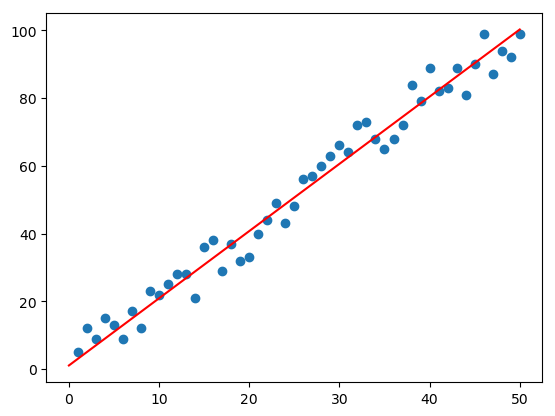

In [55]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')

In [51]:
# Me fooling around
model2 = Model(3,2)
print(model2.linear.weight)
print(model2.linear.bias)

Parameter containing:
tensor([[-0.0983, -0.3698,  0.4968],
        [ 0.1910,  0.0510,  0.4052]], requires_grad=True)
Parameter containing:
tensor([0.3867, 0.4236], requires_grad=True)
